In [36]:
import os
os.chdir('../')  # Moving up one directory to the root

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from data.data_processing import DataProcessor 
from utils.analysis import SentimentAnalysisVisualizer
from models.sentiment_model import ModelTrainer

In [37]:
# Create instances
visualizer = SentimentAnalysisVisualizer()
processor = DataProcessor()
trainer = ModelTrainer() 

In [38]:
# Load and explore the raw dataset
df = processor.load_data()

In [39]:
# Analyze ratings distribution
visualizer.analyze_ratings_distribution(df)

# Analyze sentiment distribution on the imbalanced dataset in terms of sentiment
visualizer.analyze_sentiment_distribution(df)


Rating Distribution:
Rating 0: 130,000 reviews (20.0%)
Rating 1: 130,000 reviews (20.0%)
Rating 2: 130,000 reviews (20.0%)
Rating 3: 130,000 reviews (20.0%)
Rating 4: 130,000 reviews (20.0%)

Sentiment Distribution:
Neutral: 260,000
Positive: 130,000
Positive: 260,000


In [40]:
# df_balanced = processor.create_balanced_dataset(df)
df_balanced = df

In [41]:
print(f"Total samples: {len(df_balanced)}")
visualizer.analyze_sentiment_distribution(df_balanced)

Total samples: 650000

Sentiment Distribution:
Neutral: 260,000
Positive: 130,000
Positive: 260,000


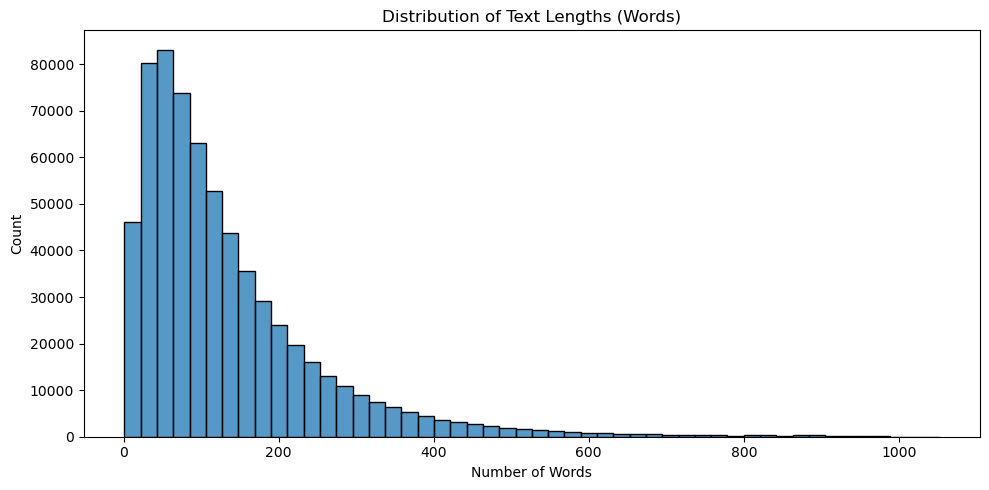


Text Length Statistics:

Word counts:
Average length: 134.1 words
Median length: 99.0 words
Max length: 1052 words
Min length: 1 words


In [42]:
visualizer.analyze_text_lengths(df_balanced['text'])

In [43]:
sample_texts = df_balanced['text'].head(5)

print("Detailed preprocessing examples from dataset:\n")
for text in sample_texts:
    processed, is_sarcastic = processor.preprocess_text(text)
    print(f"Original: {text}\n\n")
    print(f"Processed: {processed}\n\n")
    print(f"Sarcastic: {is_sarcastic}\n\n")
    print("-" * 80 + "\n")

Detailed preprocessing examples from dataset:

Original: dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank.


Processed: dr. goldberg offers everything i look for in a general practitioner. he is nice and easy to talk to without being patronizing; he is always on time in seeing his patients; he is affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him

In [44]:
sample_batch = df_balanced['text'].head(100)
processed_texts, analysis = processor.process_batch(sample_batch)

print("Batch Analysis Statistics:")
print(f"Sarcasm detected: {analysis['sarcasm_count']}")
print(f"Negations found: {analysis['negation_count']}")
print(f"Special tokens: {analysis['special_tokens_count']}")
print(f"URLs found: {analysis['url_count']}")

Batch Analysis Statistics:
Sarcasm detected: 0
Negations found: 79
Special tokens: 0
URLs found: 0


In [45]:
print("Data Quality Checks:")
print("\nNull values:")
print(df_balanced.isnull().sum())
print("\nDuplicate rows:", df_balanced.duplicated().sum())

Data Quality Checks:

Null values:
label        0
text         0
sentiment    0
dtype: int64

Duplicate rows: 0


Token Length Statistics:
Mean: 143.8
Median: 132.0
95th percentile: 256.0
Max: 256


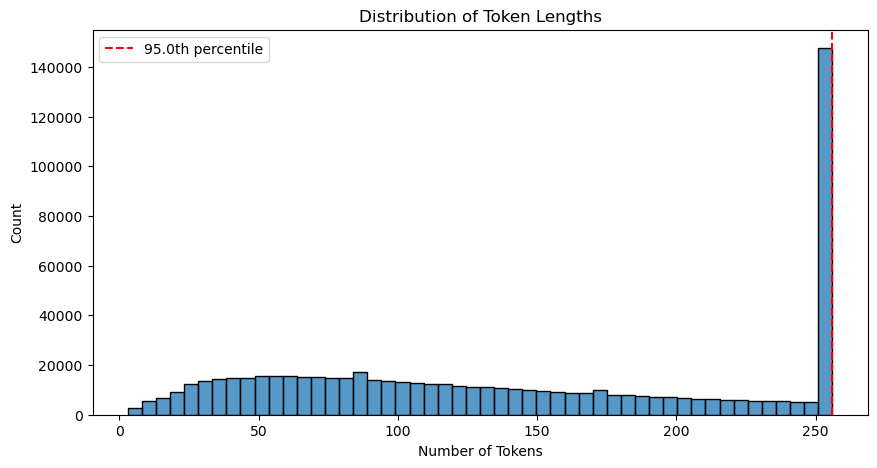


Recommended MAX_LENGTH: 256


In [46]:
# Get tokenized dataset from ModelTrainer
encoded_data = trainer.prepare_dataset(df_balanced['text'])

# Analyze token lengths
suggested_length = SentimentAnalysisVisualizer.analyze_token_lengths(encoded_data)
MAX_LENGTH = min(512, (suggested_length + 15) // 16 * 16)
print(f"\nRecommended MAX_LENGTH: {MAX_LENGTH}")

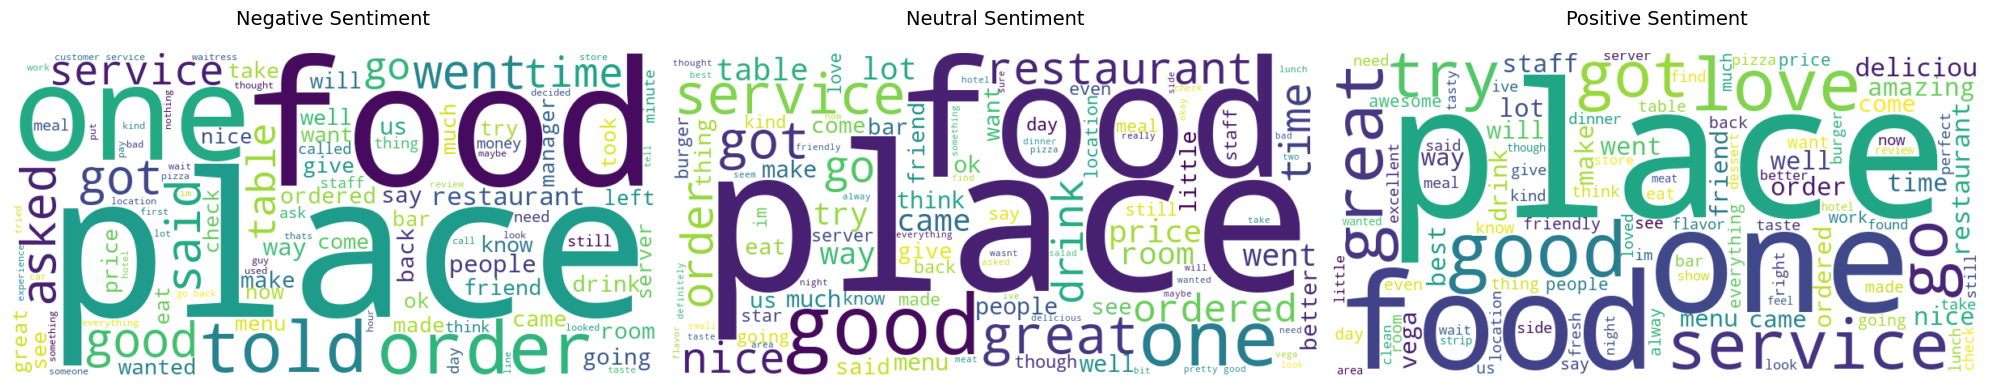


Most Common Words by Sentiment:

Negative:
  the: 1944846
  and: 1186293
  to: 1079670
  was: 766693
  of: 556890
  it: 520552
  for: 455488
  in: 439018
  that: 410145
  my: 365611

Neutral:
  the: 937865
  and: 537930
  to: 412285
  was: 348511
  of: 285688
  it: 255219
  for: 219261
  is: 214449
  in: 198812
  but: 193852

Positive:
  the: 1474704
  and: 1043208
  to: 664249
  of: 473582
  was: 465421
  is: 409882
  it: 362066
  in: 347576
  for: 343789
  with: 258530


In [47]:
visualizer.visualize_sentiment_wordclouds(df_balanced)

In [48]:
def display_processed_reviews(df, num_samples=5):
    """
    Display a sample of reviews with their associated labels.
    
    Args:
        df: DataFrame containing the reviews and labels
        num_samples: Number of reviews to display (default: 5)
    """
    # Create sample with all required fields
    samples = df.sample(n=num_samples, random_state=42)
    
    for idx, row in samples.iterrows():
        # Process the text to get sarcasm info
        processed_text, is_sarcastic = DataProcessor().preprocess_text(row['text'])
        
        # Calculate polarity score
        polarity_score = DataProcessor()._calculate_polarity_score(row['text'])
        
        # Check for negation
        has_negation = '_NEG_' in processed_text
        
        print(f"\n{'='*80}")
        print(f"Review #{idx}")
        print(f"\nOriginal Text:\n{row['text'][:200]}...")
        print(f"\nProcessed Text:\n{processed_text[:200]}...")
        print(f"\nLabels:")
        print(f"- Sentiment: {row['sentiment']} ({'Negative' if row['sentiment'] == 0 else 'Neutral' if row['sentiment'] == 1 else 'Positive'})")
        print(f"- Sarcasm Detected: {is_sarcastic}")
        print(f"- Contains Negation: {has_negation}")
        print(f"- Polarity Score: {polarity_score:.2f}")

In [49]:
display_processed_reviews(df_balanced, num_samples=10)  # Display 3 sample reviews


Review #177288

Original Text:
First of all i'm not a big fan of buffet, i tried it because we got a $50 credit for staying here at Monte Carlo in Las Vegas and my friend wanted it so I gave it a chance. Decent taste and There wasn...

Processed Text:
first of all i am not_NEG a big fan of buffet, i tried it because we got a $50 credit for staying here at monte carlo in las vegas and my friend wanted it so i gave it a chance. decent taste and there...

Labels:
- Sentiment: 0 (Negative)
- Sarcasm Detected: False
- Contains Negation: False
- Polarity Score: 0.30

Review #238756

Original Text:
Thanks Yelp. I was looking for the words to describe this place and Meh seems fitting.\n\nPlayboy club is located under Moon at the Palms. We got in for free thanks to the promoter hookup we got. Firs...

Processed Text:
thanks yelp. i was looking for the words to describe this place and meh seems fitting.\n\nplayboy club is located under moon at the palms. we got in for free thanks to the promote

In [50]:
def analyze_text_signals(df):
    """
    Analyze and display the distribution of sarcasm and negation in the dataset.
    Also shows their relationship with sentiment classes.
    
    Args:
        df: DataFrame containing the reviews
    """
    # Process all texts to get sarcasm and negation info
    results = []
    processor = DataProcessor()
    
    print("Processing texts... This may take a while...\n")
    
    for text in df['text']:
        processed_text, is_sarcastic = processor.preprocess_text(text)
        has_negation = any(neg in processed_text for neg in processor.sarcasm_detector.strong_markers)
        results.append({
            'sarcastic': is_sarcastic,
            'has_negation': has_negation
        })
    
    # Convert results to DataFrame for easy analysis
    results_df = pd.DataFrame(results)
    
    # Overall statistics
    total_reviews = len(df)
    sarcastic_count = results_df['sarcastic'].sum()
    negation_count = results_df['has_negation'].sum()
    
    print(f"Total Reviews Analyzed: {total_reviews}")
    print(f"\nSarcasm Detection:")
    print(f"- Reviews with sarcasm: {sarcastic_count} ({(sarcastic_count/total_reviews*100):.2f}%)")
    print(f"- Reviews without sarcasm: {total_reviews - sarcastic_count} ({((total_reviews - sarcastic_count)/total_reviews*100):.2f}%)")
    
    print(f"\nNegation Analysis:")
    print(f"- Reviews with negation: {negation_count} ({(negation_count/total_reviews*100):.2f}%)")
    print(f"- Reviews without negation: {total_reviews - negation_count} ({((total_reviews - negation_count)/total_reviews*100):.2f}%)")
    
    # Cross-tabulation of sarcasm and negation
    print("\nCross-tabulation of Sarcasm and Negation:")
    cross_tab = pd.crosstab(results_df['sarcastic'], results_df['has_negation'])
    print(cross_tab)
    
    # If sentiment column exists, show distribution across sentiment classes
    if 'sentiment' in df.columns:
        print("\nDistribution across Sentiment Classes:")
        df_with_signals = df.copy()
        df_with_signals['sarcastic'] = results_df['sarcastic']
        df_with_signals['has_negation'] = results_df['has_negation']
        
        sentiment_signals = pd.crosstab(
            df_with_signals['sentiment'], 
            [df_with_signals['sarcastic'], df_with_signals['has_negation']]
        )
        print("\nCounts for each combination (sentiment, sarcasm, negation):")
        print(sentiment_signals)

In [51]:
# For the full dataset
analyze_text_signals(df)

# Or for the balanced dataset
analyze_text_signals(df_balanced)

Processing texts... This may take a while...

Total Reviews Analyzed: 650000

Sarcasm Detection:
- Reviews with sarcasm: 759 (0.12%)
- Reviews without sarcasm: 649241 (99.88%)

Negation Analysis:
- Reviews with negation: 570 (0.09%)
- Reviews without negation: 649430 (99.91%)

Cross-tabulation of Sarcasm and Negation:
has_negation   False  True 
sarcastic                  
False         649241      0
True             189    570

Distribution across Sentiment Classes:

Counts for each combination (sentiment, sarcasm, negation):
sarcastic      False True       
has_negation   False False True 
sentiment                       
0             259535   150   315
1             129882    24    94
2             259824    15   161
Processing texts... This may take a while...

Total Reviews Analyzed: 650000

Sarcasm Detection:
- Reviews with sarcasm: 759 (0.12%)
- Reviews without sarcasm: 649241 (99.88%)

Negation Analysis:
- Reviews with negation: 570 (0.09%)
- Reviews without negation: 649430 (